In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("epl_final.csv")

In [5]:
data.head()

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0


In [6]:
data.shape #kitne match hue hai 2025 tak

(9380, 22)

In [7]:
data.columns

Index(['Season', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards'],
      dtype='object')

In [8]:
# now we will try to check how many teams win how many matches
#h_wins = home wins
h_wins =data[data["FullTimeResult"] == 'H']['HomeTeam'].value_counts()
#a_wins = away team wins
a_wins = data[data['FullTimeResult'] == 'A']['AwayTeam'].value_counts()
# Combining both resuts 
total_wins = h_wins.add(a_wins, fill_value=0).astype(int)

# Display result
print("Total wins per team:\n")
print(total_wins.sort_values(ascending=False))

Total wins per team:

Man United          552
Arsenal             534
Chelsea             533
Liverpool           530
Man City            500
Tottenham           440
Everton             348
Newcastle           315
Aston Villa         279
West Ham            272
Fulham              199
Southampton         186
Leicester           164
Crystal Palace      149
Blackburn           138
Bolton              129
Sunderland          127
Wolves              126
West Brom           116
Stoke               116
Middlesbrough       104
Bournemouth          94
Leeds                92
Brighton             91
Burnley              88
Wigan                85
Charlton             83
Swansea              82
Portsmouth           75
Birmingham           71
Watford              67
Norwich              54
Brentford            53
Hull                 41
Nott'm Forest        36
Sheffield United     34
Ipswich              33
Reading              32
QPR                  22
Derby                19
Cardiff           

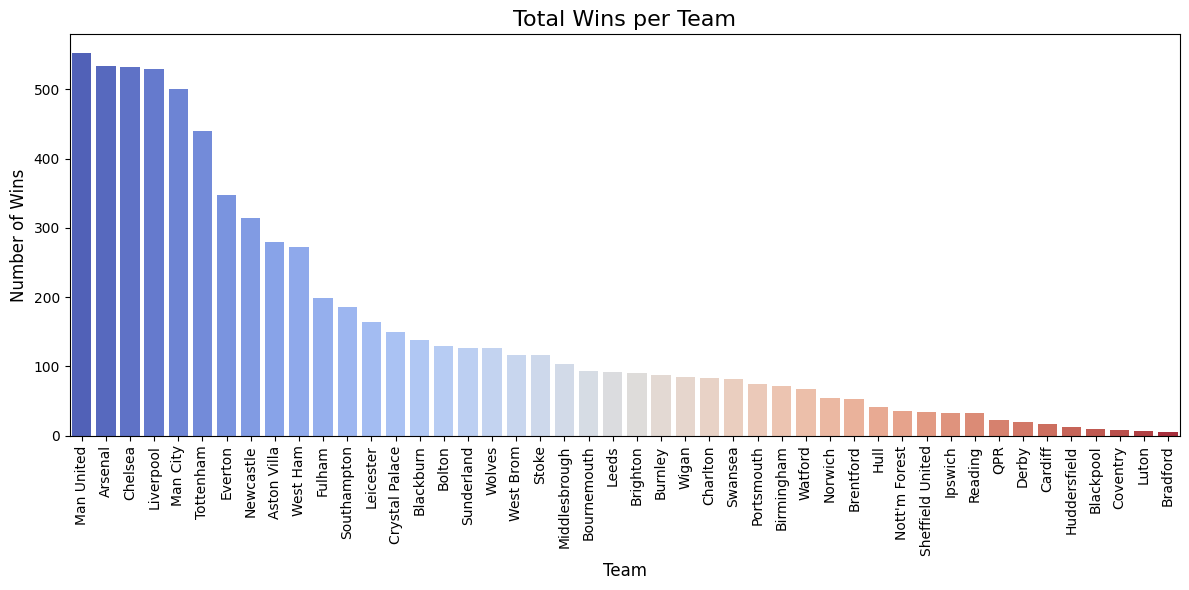

In [9]:
import seaborn as sns

# Sort values for better visualization
total_wins = total_wins.sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=total_wins.index, y=total_wins.values, palette='coolwarm')

# Add titles and labels
plt.title("Total Wins per Team", fontsize=16)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Number of Wins", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [10]:
home_goals = data.groupby("HomeTeam")["FullTimeHomeGoals"].sum()

away_goals = data.groupby("AwayTeam")["FullTimeAwayGoals"].sum()

total_goals = home_goals.add(away_goals, fill_value=0)
#sorting
total_goals = total_goals.sort_values(ascending=False)

print("Total Goals Scored by Each Team:\n")
print(total_goals)

top_team = total_goals.idxmax()
top_goals = total_goals.max()

print("\nThe highest scoring team is:", top_team, "with", int(top_goals), "goals!")


Total Goals Scored by Each Team:

HomeTeam
Arsenal             1778
Liverpool           1747
Man City            1719
Man United          1704
Chelsea             1701
Tottenham           1521
Everton             1202
Newcastle           1152
West Ham            1050
Aston Villa         1038
Fulham               771
Southampton          739
Leicester            660
Crystal Palace       564
Sunderland           520
Blackburn            508
West Brom            506
Bolton               484
Wolves               454
Middlesbrough        403
Stoke                398
Bournemouth          387
Brighton             374
Leeds                361
Burnley              341
Wigan                316
Swansea              306
Charlton             294
Portsmouth           277
Watford              275
Birmingham           264
Norwich              246
Brentford            224
Hull                 181
Nott'm Forest        141
Reading              136
Ipswich              133
Sheffield United     126
QPR    

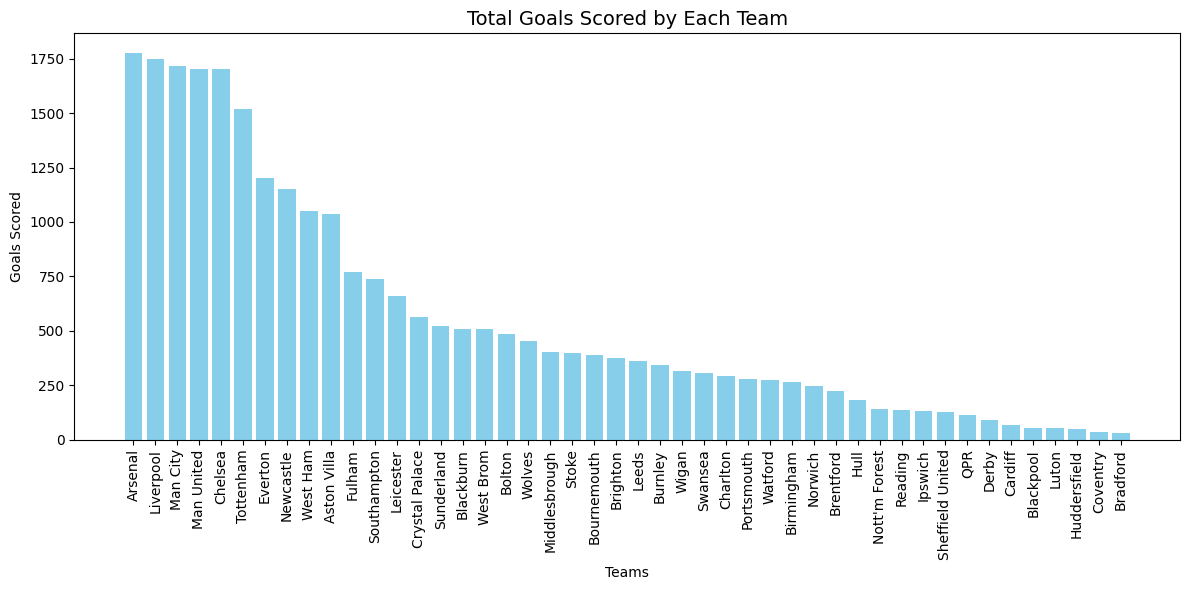

In [11]:

plt.figure(figsize=(12,6))
plt.bar(total_goals.index, total_goals.values, color="skyblue")
plt.title("Total Goals Scored by Each Team", fontsize=14)
plt.xlabel("Teams")
plt.ylabel("Goals Scored")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
home_goals = data.groupby("HomeTeam")["FullTimeHomeGoals"].sum()

away_goals = data.groupby("AwayTeam")["FullTimeAwayGoals"].sum()

total_goals = home_goals.add(away_goals, fill_value=0)
#sorting
total_goals = total_goals.sort_values(ascending=False)

print("Total Goals Scored by Each Team:\n")
print(total_goals)

low_team = total_goals.idxmin()
low_goals = total_goals.min()

print("\nThe lowest scoring team is:", low_team, "with", int(low_goals), "goals!")


Total Goals Scored by Each Team:

HomeTeam
Arsenal             1778
Liverpool           1747
Man City            1719
Man United          1704
Chelsea             1701
Tottenham           1521
Everton             1202
Newcastle           1152
West Ham            1050
Aston Villa         1038
Fulham               771
Southampton          739
Leicester            660
Crystal Palace       564
Sunderland           520
Blackburn            508
West Brom            506
Bolton               484
Wolves               454
Middlesbrough        403
Stoke                398
Bournemouth          387
Brighton             374
Leeds                361
Burnley              341
Wigan                316
Swansea              306
Charlton             294
Portsmouth           277
Watford              275
Birmingham           264
Norwich              246
Brentford            224
Hull                 181
Nott'm Forest        141
Reading              136
Ipswich              133
Sheffield United     126
QPR    

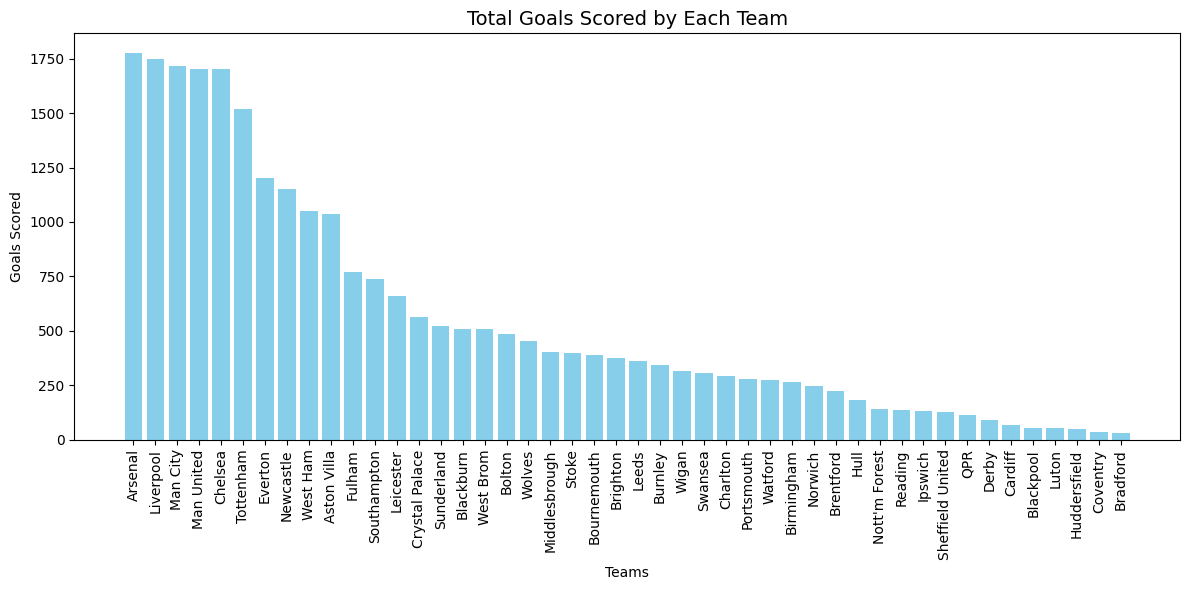

In [13]:
plt.figure(figsize=(12,6))
plt.bar(total_goals.index, total_goals.values, color="skyblue")
plt.title("Total Goals Scored by Each Team", fontsize=14)
plt.xlabel("Teams")
plt.ylabel("Goals Scored")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
#Total no. of fouls
home_fouls = data.groupby("HomeTeam")["HomeFouls"].sum()
away_fouls = data.groupby("AwayTeam")["AwayFouls"].sum()
total_fouls = home_fouls.add(away_fouls, fill_value=0)

#Total yellow cards
home_yellow = data.groupby("HomeTeam")["HomeYellowCards"].sum()
away_yellow = data.groupby("AwayTeam")["AwayYellowCards"].sum()
total_yellow = home_yellow.add(away_yellow, fill_value=0)

#Total red cards
home_red = data.groupby("HomeTeam")["HomeRedCards"].sum()
away_red = data.groupby("AwayTeam")["AwayRedCards"].sum()
total_red = home_red.add(away_red, fill_value=0)

# Combine all penalty-related stats
penalties = total_fouls + total_yellow*2 + total_red*5
penalties = penalties.sort_values()

# Show results
print("Teams with Total Penalty Scores (lower = more disciplined):\n")
print(penalties)

# Team with least penalties
least_penalty_team = penalties.idxmin()
least_penalty_value = penalties.min()

print("\n The most disciplined team is:", least_penalty_team, "with a penalty score of", int(least_penalty_value))


Teams with Total Penalty Scores (lower = more disciplined):

HomeTeam
Blackpool             507
Luton                 585
Bradford              636
Coventry              701
Cardiff               964
Huddersfield         1083
Reading              1554
Ipswich              1608
QPR                  1677
Nott'm Forest        1733
Brentford            1944
Derby                2009
Sheffield United     2397
Hull                 3108
Swansea              3447
Norwich              3671
Charlton             3949
Birmingham           4188
Portsmouth           4254
Bournemouth          4263
Watford              4411
Brighton             4446
Leeds                4716
Burnley              4832
Wigan                4861
Stoke                5995
Middlesbrough        6148
Wolves               6292
Bolton               6864
Leicester            7125
West Brom            7290
Blackburn            7316
Crystal Palace       7471
Sunderland           8733
Southampton          9625
Fulham              

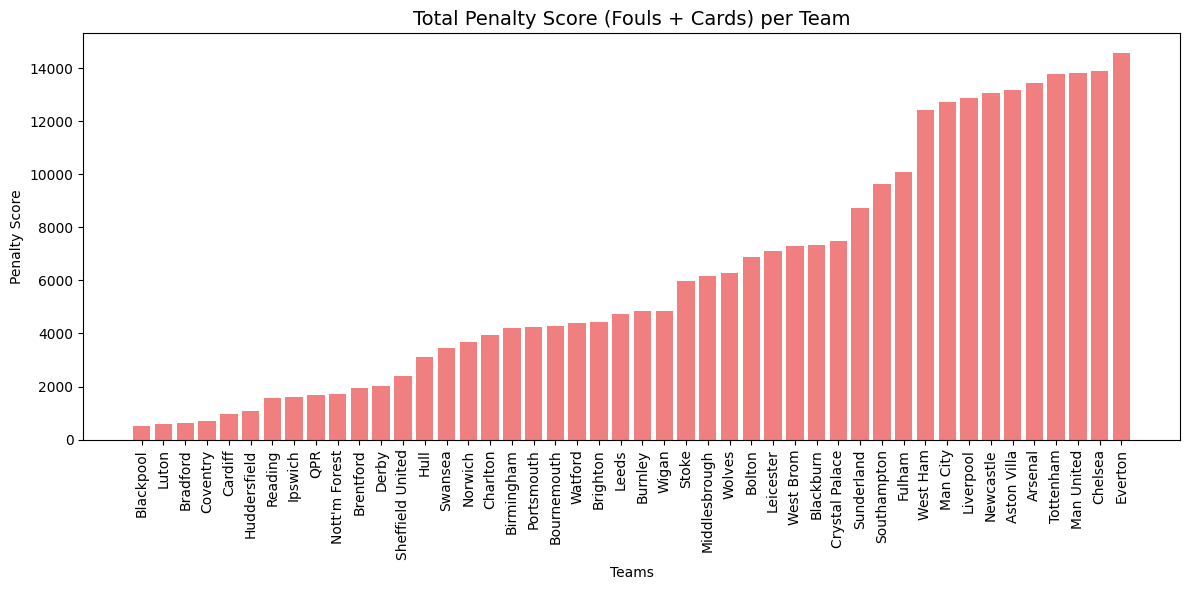

In [15]:
plt.figure(figsize=(12,6))
plt.bar(penalties.index, penalties.values, color="lightcoral")
plt.title("Total Penalty Score (Fouls + Cards) per Team", fontsize=14)
plt.xlabel("Teams")
plt.ylabel("Penalty Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
most_penalty_team = penalties.idxmax()
most_penalty_value = penalties.max()

print("\n The less disciplined team is:", most_penalty_team, "with a penalty score of", int(most_penalty_value))


 The less disciplined team is: Everton with a penalty score of 14582


In [17]:
df = data.head()

In [21]:
# total goals scored by each team
home_goals = data.groupby("HomeTeam")["FullTimeHomeGoals"].sum()
away_goals = data.groupby("AwayTeam")["FullTimeAwayGoals"].sum()
total_goals = home_goals + away_goals

# total shots taken by each team
home_shots = data.groupby("HomeTeam")["HomeShots"].sum()
away_shots = data.groupby("AwayTeam")["AwayShots"].sum()
total_shots = home_shots + away_shots

# accuracy = (goals / shots) * 100
accuracy = (total_goals / total_shots) * 100

# cleaning missing values and sorting
accuracy = accuracy.fillna(0).sort_values(ascending=False)

print("Team Accuracy in %:\n")
print(accuracy.round(2))

# best team in accuracy
best_team = accuracy.idxmax()
best_value = round(accuracy.max(), 2)
print("\nMost accurate team is:", best_team, "with", best_value, "% accuracy")

Team Accuracy in %:

HomeTeam
Arsenal             13.38
Brentford           13.07
Man City            12.87
Reading             12.67
Man United          12.57
Blackpool           12.33
Chelsea             12.14
Luton               12.06
Leicester           12.03
Charlton            11.98
Liverpool           11.95
Tottenham           11.92
Leeds               11.48
Nott'm Forest       11.31
Birmingham          11.25
Newcastle           11.21
Blackburn           11.19
Aston Villa         11.18
Ipswich             10.87
Everton             10.81
West Ham            10.81
Bournemouth         10.60
Middlesbrough       10.50
Fulham              10.40
Bolton              10.35
Swansea             10.32
Stoke               10.26
Crystal Palace      10.22
Wolves              10.04
Brighton             9.74
Southampton          9.70
Derby                9.64
Burnley              9.54
West Brom            9.51
Watford              9.48
Portsmouth           9.34
Coventry             9.25
Sunderla

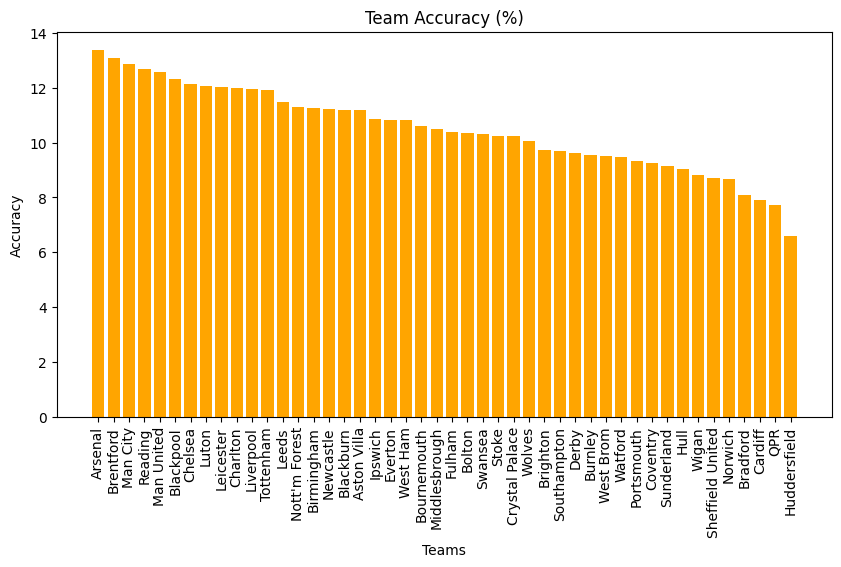

In [25]:
# bar graph
plt.figure(figsize=(10,5))
plt.bar(accuracy.index, accuracy.values, color='orange')
plt.title("Team Accuracy (%)")
plt.xlabel("Teams")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.show()

In [45]:
data.columns


Index(['Season', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards'],
      dtype='object')

In [51]:
print(data.shape)

(0, 22)


In [52]:
print(data.columns)

Index(['Season', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards'],
      dtype='object')


In [60]:
data = {
    'HomeTeam': ['Arsenal', 'Chelsea', 'Liverpool', 'Arsenal', 'Chelsea', 'Liverpool'],
    'AwayTeam': ['Chelsea', 'Arsenal', 'Arsenal', 'Liverpool', 'Liverpool', 'Chelsea'],
    'FullTimeHomeGoals': [2, 1, 0, 3, 2, 1],
    'FullTimeAwayGoals': [1, 2, 2, 1, 1, 3]
}

df = pd.DataFrame(data)
print(df)

    HomeTeam   AwayTeam  FullTimeHomeGoals  FullTimeAwayGoals
0    Arsenal    Chelsea                  2                  1
1    Chelsea    Arsenal                  1                  2
2  Liverpool    Arsenal                  0                  2
3    Arsenal  Liverpool                  3                  1
4    Chelsea  Liverpool                  2                  1
5  Liverpool    Chelsea                  1                  3


In [61]:
df['Winner'] = df.apply(lambda x: x['HomeTeam'] if x['FullTimeHomeGoals'] > x['FullTimeAwayGoals'] 
                        else (x['AwayTeam'] if x['FullTimeAwayGoals'] > x['FullTimeHomeGoals'] else 'Draw'), axis=1)

win_count = df['Winner'].value_counts()
print(win_count)


Winner
Arsenal    4
Chelsea    2
Name: count, dtype: int64


In [62]:
# Average goals scored by each team
team_goals = df.groupby('HomeTeam')['FullTimeHomeGoals'].mean() + df.groupby('AwayTeam')['FullTimeAwayGoals'].mean()
print(team_goals)

HomeTeam
Arsenal      4.5
Chelsea      3.5
Liverpool    1.5
dtype: float64


In [63]:
home_team = 'Arsenal'
away_team = 'Chelsea'

if team_goals[home_team] > team_goals[away_team]:
    print(f"Predicted Winner: {home_team}")
elif team_goals[home_team] < team_goals[away_team]:
    print(f"Predicted Winner: {away_team}")
else:
    print("Match might end in a Draw")

Predicted Winner: Arsenal


In [67]:
# Create a new column for Arsenal's goals (home or away)
df["ArsenalGoals"] = df.apply(
    lambda x: x["FullTimeHomeGoals"] if x["HomeTeam"] == "Arsenal" else (
        x["FullTimeAwayGoals"] if x["AwayTeam"] == "Arsenal" else 0
    ), axis=1)


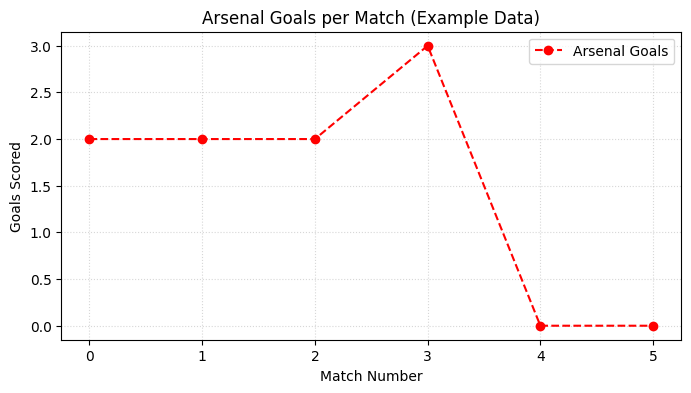

In [90]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(df)), df["ArsenalGoals"], linestyle='--', marker='o', color='red', label='Arsenal Goals')

plt.title("Arsenal Goals per Match (Example Data)")
plt.xlabel("Match Number")
plt.ylabel("Goals Scored")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

In [ ]:
pip install streamlit